In [9]:
# Autor: Pedro Fortunato Da Silva Neto, P2 Data Science
# Ciência de Dados com Python + Pandas, Numpy, SkLearning.
# Machine Learning 

#==================================================================================


#Importando a biblioteca pandas para carregar e visualizar a base de dados
import pandas as pd

#Carregando os dados do arquivo em um data frame "passageiros"
passageiros = pd.read_csv(r'C:\Users\Pichau\Downloads\Passageiros.csv')


In [10]:
#Exibe as primeiras linhas ou as linhas desejadas caso seja passada a variável entre parênteses
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [12]:
passageiros.head(8)

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
5,1949.416667,135
6,1949.500000,148
7,1949.583333,148


In [13]:
#Exibe as ultimas linhas ou as linhas desejadas caso seja passada a variável entre parênteses
passageiros.tail()

,tempo,nPassageiros
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


In [14]:
passageiros.tail(6)

,tempo,nPassageiros
138,1960.500000,622
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


In [15]:
#Exibindo os dados estatisticos do Data frame *Só funciona com dados numéricos
passageiros.describe()


,tempo,nPassageiros
count,144.000000,144.000000
mean,1954.958333,280.298611
std,3.476109,119.966317
min,1949.000000,104.000000
25%,1951.979167,180.000000
50%,1954.958333,265.500000
75%,1957.937500,360.500000
max,1960.916667,622.000000


<AxesSubplot:xlabel='tempo', ylabel='nPassageiros'>

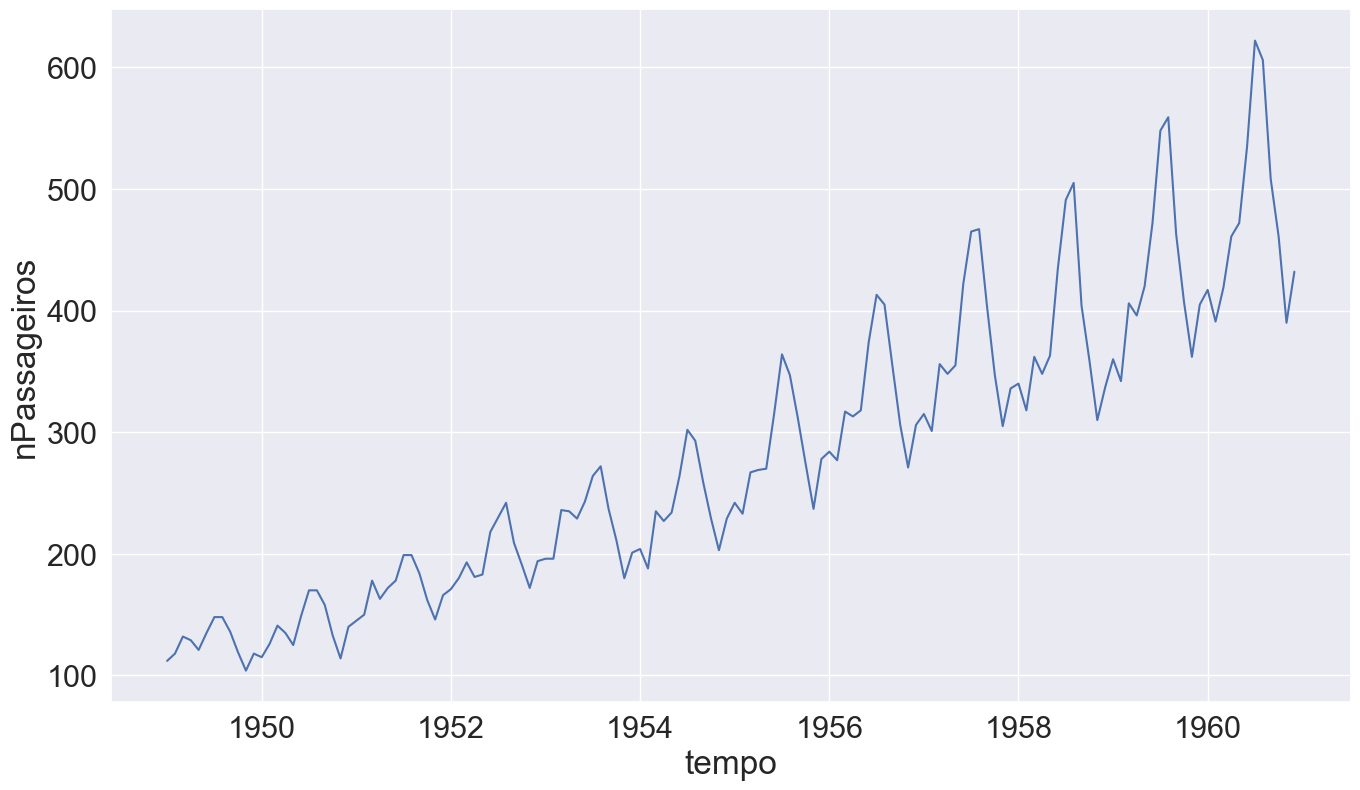

In [16]:
#Com as bibliotecas seaborn e matplotlib vamos conseguir gerar gráficos para visualizar a base de dados de um modo mais visual e explicito. 
import seaborn as sns
import matplotlib.pyplot as plt

# Plotando um gráfico de linhas
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)


In [17]:
#Seleciona todas as colunas
nPassageiros = passageiros.iloc[:,1].values
#Um exemplo de como selecionar todas as colunas menos a última
Tempo = passageiros.iloc[:,:-1].values


In [18]:
#Separando parte dos dados para treino e teste
from sklearn.model_selection import train_test_split

#Cria colunas para dividir entre treino e teste
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, 
                                                                                      test_size = 0.3)

#Importando o algoritimo que será utilizado
from sklearn import linear_model
regressor = linear_model.LinearRegression()

#Ajustando a reta aos dados de treino
regressor.fit(Tempo_treino,nPassageiros_treino)

#Começando a testar
nPassageiros_predito = regressor.predict(Tempo_teste)

#Importando a biblioteca numpy que será utilizada posteriormente
import numpy as np

#Colocando os dados em um data frame para posteriormente gerar uma figura com o Seaborn
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })

<AxesSubplot:xlabel='Tempo', ylabel='nPassageiros'>

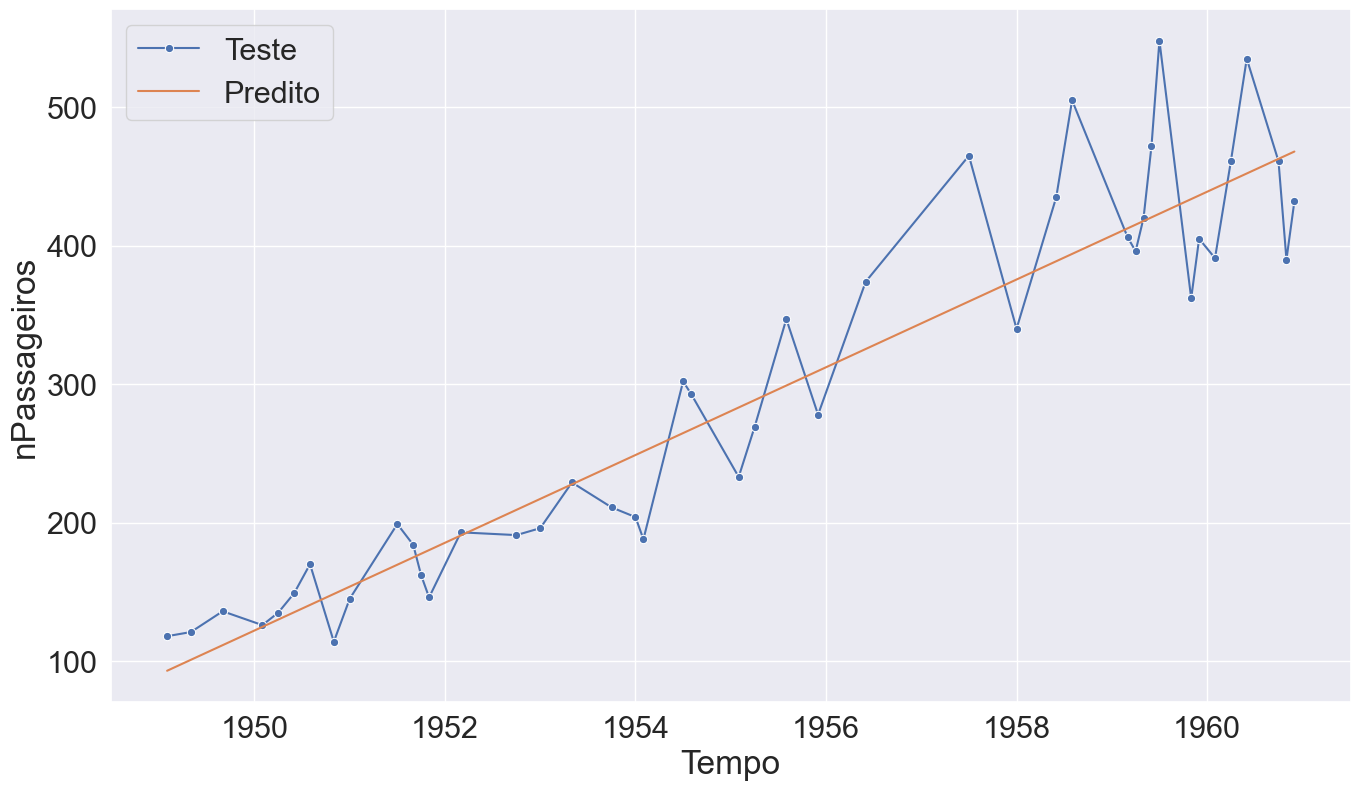

In [19]:
#Plotando o gráfico de predito e teste
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )

In [20]:
# Coeficientes
print('Coeficiente: \n', regressor.coef_)

# MSE (mean square error)
print("MSE: %.2f" % np.mean((regressor.predict(Tempo) - nPassageiros) ** 2))

# Score de variação: 1 representa predição perfeita
print('Score de variação: %.2f' % regressor.score(Tempo, nPassageiros))


Coeficiente: 
 [32.6601858]
MSE: 2107.06
Score de variação: 0.85


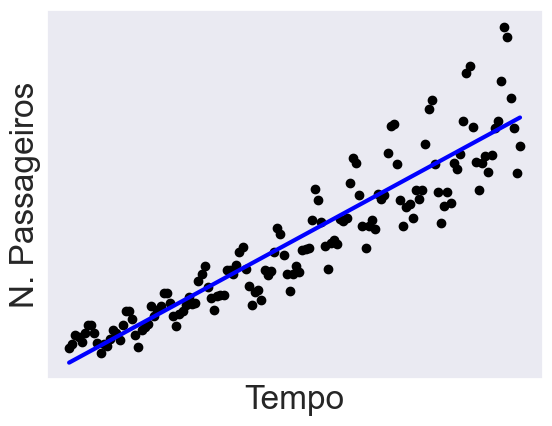

In [21]:
# Scatter Plot representando a regressão linear
plt.scatter(Tempo, nPassageiros,  color = 'black')
plt.plot(Tempo, regressor.predict(Tempo), color = 'blue', linewidth = 3)
plt.xlabel('Tempo')
plt.ylabel('N. Passageiros')
plt.xticks(())
plt.yticks(())
plt.show()